<a href="https://colab.research.google.com/github/IlTACK-OH/practical_statistics_for_data_scientists/blob/main/day4_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 회귀와 예측
## 4.1 단순선형회귀
단순 선형회귀는 한 변수와 다른 변수의 크기 사이에 어떤 관계, 예를 들어 X가 증가하면 Y도 증가, 아니면 반대로 X가 증가하면 Y는 감소하는 식의 관계에 대한 모델을 제공한다.<br>

상관관계가 두 변수 사이에 전체적인 관련 강도를 측정하는 것이라면, 회귀는 관계 자체를 정량화하는 방법이라는 점에서 차이가 존재한다.<br>

### 4.1.1 회귀식
단순선형회귀를 통하여 X가 얼만큼 변하면 Y가 어느 정도 변하는지를 정확히 추정할 수 있다. 상관계수의 경우, 변수X와 Y가 바뀌어도 상관없다.<br>
회귀에서는 다음과 같은 식으로 선형관계를 이용하여 변수 X로부터 변수 Y를 예측하고자 한다.
$$
Y = b_0 + b_1X
$$
$b_0$는 절편(상수)그리고 $b_1$은 $X$의 기울기(slope) 혹은 계수(coefficient)라고 한다. R에서는 절편과 기울기 모두 계수로 출력되기도 한다.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import files
files.upload();

Saving LungDisease.csv to LungDisease.csv


In [6]:
lung=pd.read_csv('LungDisease.csv')

In [7]:
lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [8]:
predictors=['Exposure']
outcome='PEFR'

model = LinearRegression()
model.fit(lung[predictors],lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


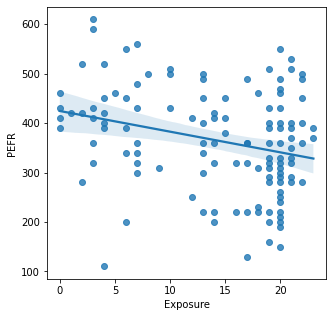

In [17]:
plt.figure(figsize=(5,5))
sns.regplot(x=lung['Exposure'],y=lung[outcome])
plt.show()

### 4.1.2 적합값과 잔차
회귀분석에서 중요한 개념은 **적합값**(예측값)과 **잔차**(예측 오차)이다. 보통 모든 데이터가 정확히 한 직선 안에 들어오지는 않는다. 따라서 회귀식은 명시적으로 오차항 $e_i$를 포함한다.<br><br>
$$
Y_i = b_0 + b_1X_i + e_i
$$<br>
적합값은 예측값을 지칭하는 말로, 보통 $\hat{Y_i}$로 나타낸다. 다음과 같이 나타낼 수 있다.<br><br>
$$
\hat{Y_i} = \hat{b_0} + \hat{b_1}X_i
$$
여기서 $\hat{b_0}$와 $\hat{b_1}$은 이미 알려진 값이 아닌 추정을 통하여 얻은 값이라는 것을 의미한다.<br>

따라서 잔차는 다음과 같이 나타낼 수 있다.
$$
\hat{e_i} = Y_i - \hat{Y_i}
$$


In [61]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

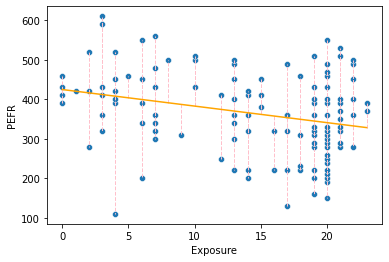

In [72]:
x_fit = np.array([min(lung['Exposure']),max(lung['Exposure'])])
y_fit = x_fit*model.coef_[0] + model.intercept_

sns.scatterplot(x=lung['Exposure'],y=lung['PEFR'])
plt.plot(x_fit, y_fit, color = 'orange')
for i in range(len(lung['PEFR'])):
  plt.vlines(lung['Exposure'][i],model.coef_[0]*lung['Exposure'][i]+ model.intercept_,lung['PEFR'][i], linestyle='--', colors='pink', linewidth=1)
plt.show()

위의 그래프는 폐활량에 대한 회귀선으로부터 얻은 잔차를 설명한다. 데이터 포인트에서 직선 사이에 수직으로 그은 점선들이 바로 잔차를 의미한다.